In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [7]:
df = pd.read_csv('Linear_Regression_Car_Price_Data.csv')
df.head()

,Car_Name,Aspirational_Value,Age,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800,General,15,70000,Petrol,Individual,Manual,First_Owner,60000
1,WagonR,General,15,50000,Petrol,Individual,Manual,First_Owner,135000
2,Verna,General,10,100000,Diesel,Individual,Manual,First_Owner,600000
3,RediGO,General,5,46000,Petrol,Individual,Manual,First_Owner,250000
4,Amaze,General,8,141000,Diesel,Individual,Manual,Second_Owner,450000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car_Name            4333 non-null   object
 1   Aspirational_Value  4333 non-null   object
 2   Age                 4333 non-null   int64 
 3   km_driven           4333 non-null   int64 
 4   fuel                4333 non-null   object
 5   seller_type         4333 non-null   object
 6   transmission        4333 non-null   object
 7   owner               4333 non-null   object
 8   selling_price       4333 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 304.8+ KB


In [50]:
df.isna().sum()

Car_Name              0
Aspirational_Value    0
Age                   0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
selling_price         0
dtype: int64

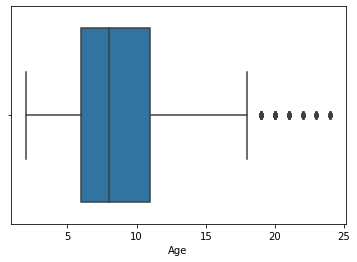

In [5]:
sns.boxplot(x='Age', data=df)
plt.show()

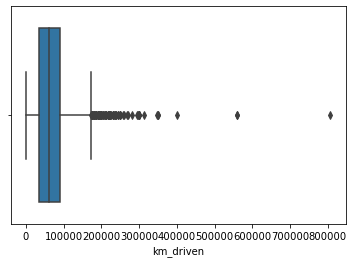

In [6]:
sns.boxplot(x='km_driven', data=df)
plt.show()

In [53]:
## Outlier treatment with Z Score

threshold = 3
outlier = []

for i in df['Age']:
    z = (i-df['Age'].mean())/df['Age'].std()
    if z > threshold:
        outlier.append(i)
        
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))

## calculate the median for the column excluding the outlier
med = df.loc[df['Age']<= min(outlier), 'Age'].median()
print('Median of the column excluding outliers-->',med)

f = lambda x: med if x>= min(outlier) else x
df['out_treated_age'] = df['Age'].map(f)

max(df['out_treated_age'])

df.drop(['Age'], axis=1,inplace = True)

outlier in dataset is [24, 22, 23, 23, 23, 22, 22, 22, 23, 22, 24, 22, 24, 24, 23, 24, 24, 22, 22, 22, 23, 23, 24, 24, 24, 23, 24, 24, 24, 23, 23, 22, 22, 22]
minimum of the outlier list 22
Median of the column excluding outliers--> 8.0


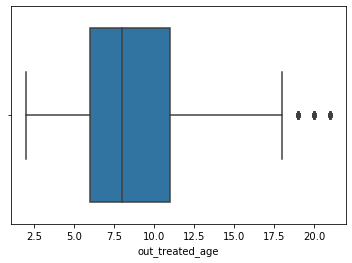

In [54]:
sns.boxplot(x='out_treated_age', data=df)
plt.show()

In [55]:
## Outlier treatment with Z Score

threshold = 3
outlier = []

for i in df['km_driven']:
    z = (i-df['km_driven'].mean())/df['km_driven'].std()
    if z > threshold:
        outlier.append(i)
        
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))

## calculate the median for the column excluding the outlier
med = df.loc[df['km_driven']<= min(outlier), 'km_driven'].median()
print('Median of the column excluding outliers-->',med)

f = lambda x: med if x>= min(outlier) else x
df['out_treated_km_driven'] = df['km_driven'].map(f)

max(df['out_treated_km_driven'])

df.drop(['km_driven'], axis=1,inplace = True)

outlier in dataset is [350000, 230000, 230000, 213000, 212814, 220000, 217871, 560000, 206500, 300000, 223000, 806599, 234000, 235000, 223660, 213000, 300000, 244000, 312000, 230000, 245244, 350000, 267000, 250000, 220000, 250000, 221000, 223000, 270000, 296823, 260000, 210000, 250000, 240000, 224642, 222435, 238000, 235000, 300000, 295000, 400000, 347089, 222252, 220000, 300000, 280000, 250000, 300000, 250000, 560000, 256000, 230000, 218000, 218000, 210000]
minimum of the outlier list 206500
Median of the column excluding outliers--> 60000.0


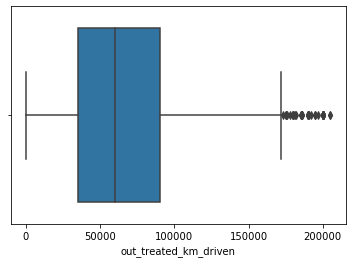

In [56]:
sns.boxplot(x='out_treated_km_driven', data=df)
plt.show()

In [57]:
data = df.drop('Car_Name',axis=1)
dummy_data = pd.get_dummies(data,drop_first = True)
dummy_data.columns

Index(['selling_price', 'out_treated_age', 'out_treated_km_driven',
       'Aspirational_Value_Premium', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark_Dealer', 'transmission_Manual',
       'owner_Fourth&Above Owner', 'owner_Second_Owner', 'owner_TestDriveCar',
       'owner_Third_Owner'],
      dtype='object')

In [58]:
y=dummy_data['selling_price']
X=dummy_data.drop('selling_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
train_data = pd.concat([X_train,y_train], axis = 1)
test_data = pd.concat([X_test,y_test], axis = 1)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
reg_model = model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     281.5
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:03:27   Log-Likelihood:                -49671.
No. Observations:                3466   AIC:                         9.937e+04
Df Residuals:                    3452   BIC:                         9.946e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [60]:
# 2nd Iteration of model training

formula = 'selling_price ~ out_treated_age + out_treated_km_driven + Aspirational_Value_Premium + fuel_Diesel + \
            fuel_Electric + seller_type_Individual + seller_type_Trustmark_Dealer + transmission_Manual +  \
            owner_Second_Owner '

X_train = sm.add_constant(X_train)
model2 = smf.ols(formula,data = train_data)
reg_model2 = model2.fit()
print(reg_model2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     457.7
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:03:34   Log-Likelihood:                -49672.
No. Observations:                3466   AIC:                         9.936e+04
Df Residuals:                    3457   BIC:                         9.942e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [65]:
train_data_for_pred = train_data[['out_treated_age','out_treated_km_driven','Aspirational_Value_Premium','fuel_Diesel',\
                                 'fuel_Electric','seller_type_Individual','seller_type_Trustmark_Dealer','transmission_Manual',\
                                  'owner_Second_Owner' ]]

train_data_for_pred = sm.add_constant(train_data_for_pred)
train_pred = reg_model2.predict(train_data_for_pred)

test_data_for_pred = test_data[['out_treated_age','out_treated_km_driven','Aspirational_Value_Premium','fuel_Diesel',\
                                 'fuel_Electric','seller_type_Individual','seller_type_Trustmark_Dealer','transmission_Manual',\
                                  'owner_Second_Owner' ]]
test_data_for_pred = sm.add_constant(test_data_for_pred)
test_pred = reg_model2.predict(test_data_for_pred)

In [67]:
train_residuals = abs(train_data['selling_price']) - abs(train_pred)

test_residuals = abs(test_data['selling_price']) - abs(test_pred)


0.0
0.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),
C:\Users\PandaBas\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


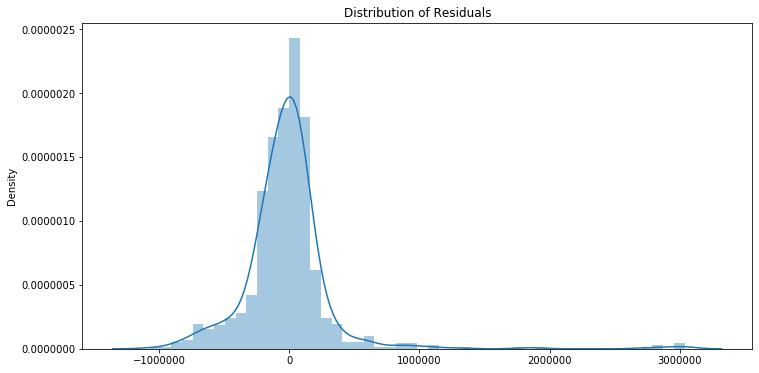

'Residuals are not normally distributed, try after data transformation'

In [85]:
## Assumption-1 if the residuals are normally distributed

'''
H0 :- Data is normally distributed
H1:- Data is not normally distributed '''

print(normal_ad(test_residuals)[1])
print(normal_ad(train_residuals)[1])

plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(test_residuals)
plt.show()
'''Residuals are not normally distributed, try after data transformation'''




In [87]:
## Log transformation

train_data['selling_price_log'] = np.log(train_data['selling_price'])
train_data['out_treated_age_log'] = np.log(train_data['out_treated_age'])
train_data['out_treated_km_driven_log'] = np.log(train_data['out_treated_km_driven'])

test_data['selling_price_log'] = np.log(test_data['selling_price'])
test_data['out_treated_age_log'] = np.log(test_data['out_treated_age'])
test_data['out_treated_km_driven_log'] = np.log(test_data['out_treated_km_driven'])

log_y_train = train_data['selling_price_log']


formula = 'selling_price_log ~ out_treated_age_log + out_treated_km_driven_log + Aspirational_Value_Premium + fuel_Diesel + \
            fuel_Electric + seller_type_Individual + seller_type_Trustmark_Dealer + transmission_Manual +  \
            owner_Second_Owner '

X_train = sm.add_constant(X_train)
model3 = smf.ols(formula,data = train_data)
reg_model3 = model3.fit()
print(reg_model3.summary())



                            OLS Regression Results                            
Dep. Variable:      selling_price_log   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     978.6
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:43:27   Log-Likelihood:                -2254.9
No. Observations:                3466   AIC:                             4528.
Df Residuals:                    3457   BIC:                             4583.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [101]:
formula = 'selling_price_log ~ out_treated_age_log + out_treated_km_driven_log + Aspirational_Value_Premium + fuel_Diesel + \
            fuel_Electric + seller_type_Individual + seller_type_Trustmark_Dealer + transmission_Manual '

X_train = sm.add_constant(X_train)
model4 = smf.ols(formula,data = train_data)
reg_model4 = model4.fit()
print(reg_model4.summary())

                            OLS Regression Results                            
Dep. Variable:      selling_price_log   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:16:04   Log-Likelihood:                -2255.6
No. Observations:                3466   AIC:                             4527.
Df Residuals:                    3458   BIC:                             4576.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [102]:
train_data_for_pred_log = train_data[['out_treated_age_log','out_treated_km_driven_log','Aspirational_Value_Premium','fuel_Diesel',\
                                 'fuel_Electric','seller_type_Individual','seller_type_Trustmark_Dealer','transmission_Manual']]

test_data_for_pred_log = test_data[['out_treated_age_log','out_treated_km_driven_log','Aspirational_Value_Premium','fuel_Diesel',\
                                 'fuel_Electric','seller_type_Individual','seller_type_Trustmark_Dealer','transmission_Manual']]

train_data_for_pred_log = sm.add_constant(train_data_for_pred_log)
train_pred_log = reg_model3.predict(train_data_for_pred_log)

test_data_for_pred_log = sm.add_constant(test_data_for_pred_log)
test_pred_log = reg_model3.predict(test_data_for_pred_log)

train_residuals_log = abs(train_data['selling_price_log']) - abs(train_pred_log)

test_residuals_log = abs(test_data['selling_price_log']) - abs(test_pred_log)

print(normal_ad(test_residuals_log)[1])
print(normal_ad(train_residuals_log)[1])

0.006477283858897641
1.8235608593956665e-07


In [91]:
'''Durbin-Watson test has a value 2.005 (nearly equal to 2) so we can safely assume that there is no autocorrelation
if at all the the test fails after a data transformation the DW value hovers around 2 in most of the cases'''

'Durbin-Watson test has a value 2.005 (nearly equal to 2) so we can safely assume that there is no autocorrelation'

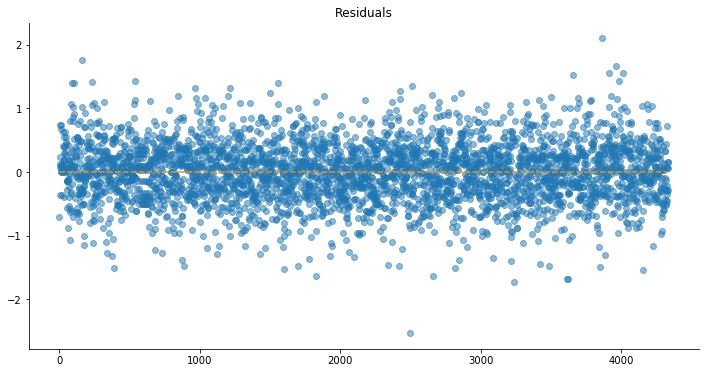

In [96]:
train_residuals_log_df = pd.DataFrame(train_residuals_log)
train_residuals_log_df.columns = ['Residuals']

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=train_residuals_log_df.index, y=train_residuals_log_df.Residuals, alpha=0.5)
plt.plot(np.repeat(0, train_residuals_log_df.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show() 

In [103]:
'''White test :- H0: homoskedasticity Ha: heteroskedasticity'''

white_test = het_white(reg_model4.resid,  reg_model4.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 126.25955744160501, 'Test Statistic p-value': 4.2170670546858635e-14, 'F-Statistic': 4.479264459380884, 'F-Test p-value': 2.1154008371238397e-14}


In [109]:
X = add_constant(X_train)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])],index=X.columns)

const                           137.119581
out_treated_age                   1.604091
out_treated_km_driven             1.663509
Aspirational_Value_Premium        1.236651
fuel_Diesel                      30.727915
fuel_Electric                          NaN
fuel_LPG                          1.653715
fuel_Petrol                      30.627444
seller_type_Individual            1.244121
seller_type_Trustmark_Dealer      1.088493
transmission_Manual               1.182959
owner_Fourth&Above Owner          1.069654
owner_Second_Owner                1.266615
owner_TestDriveCar                1.027936
owner_Third_Owner                 1.205021
dtype: float64

In [110]:
formula = 'selling_price_log ~ out_treated_age_log + out_treated_km_driven_log + Aspirational_Value_Premium +  \
            fuel_Electric + seller_type_Individual + seller_type_Trustmark_Dealer + transmission_Manual '

X_train = sm.add_constant(X_train)
model5 = smf.ols(formula,data = train_data)
reg_model5 = model5.fit()
print(reg_model5.summary())

                            OLS Regression Results                            
Dep. Variable:      selling_price_log   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1009.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:27:28   Log-Likelihood:                -2552.2
No. Observations:                3466   AIC:                             5118.
Df Residuals:                    3459   BIC:                             5161.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [113]:
X_train_subset = train_data[['out_treated_age_log','out_treated_km_driven_log','Aspirational_Value_Premium', \
            'seller_type_Individual','seller_type_Trustmark_Dealer','transmission_Manual']]
X = add_constant(X_train_subset)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                           166.313478
out_treated_age_log               1.529801
out_treated_km_driven_log         1.533948
Aspirational_Value_Premium        1.128513
seller_type_Individual            1.159979
seller_type_Trustmark_Dealer      1.083871
transmission_Manual               1.175124
dtype: float64

In [114]:
formula = 'selling_price_log ~ out_treated_age_log + out_treated_km_driven_log + Aspirational_Value_Premium +  \
            seller_type_Individual + seller_type_Trustmark_Dealer + transmission_Manual '

X_train = sm.add_constant(X_train)
model5 = smf.ols(formula,data = train_data)
reg_model6 = model6.fit()
print(reg_model6.summary())

                            OLS Regression Results                            
Dep. Variable:      selling_price_log   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1009.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:32:20   Log-Likelihood:                -2552.2
No. Observations:                3466   AIC:                             5118.
Df Residuals:                    3459   BIC:                             5161.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [8]:
df.shape

(4333, 9)

In [118]:
# sample_data = df.sample(n = 1200)
# sample_data.to_csv('lrreg_data.csv')
data = pd.read_csv('lrreg_data.csv')

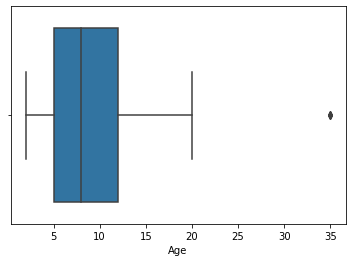

In [119]:
sns.boxplot(x='Age', data=data)
plt.show()

In [120]:
## Outlier treatment with Z Score

threshold = 3
outlier = []

for i in data['Age']:
    z = (i-data['Age'].mean())/data['Age'].std()
    if z > threshold:
        outlier.append(i)
        
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))

## calculate the median for the column excluding the outlier
med = data.loc[data['Age']<= min(outlier), 'Age'].median()
print('Median of the column excluding outliers-->',med)

f = lambda x: med if x>= min(outlier) else x
data['out_treated_age'] = data['Age'].map(f)

max(data['out_treated_age'])

data.drop(['Age'], axis=1,inplace = True)

outlier in dataset is [35, 35, 35, 35]
minimum of the outlier list 35
Median of the column excluding outliers--> 8.0


In [121]:
data['out_treated_age'].describe()

count    1200.000000
mean        8.861667
std         4.104051
min         2.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: out_treated_age, dtype: float64

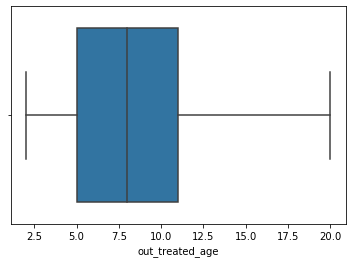

In [122]:
sns.boxplot(x='out_treated_age', data=data)
plt.show()

In [123]:
threshold = 3
outlier = []

for i in data['out_treated_age']:
    z = (i-data['out_treated_age'].mean())/data['out_treated_age'].std()
    if z > threshold:
        outlier.append(i)
        
print('outlier in dataset is', outlier)

outlier in dataset is []


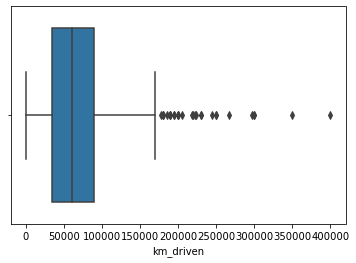

In [124]:
sns.boxplot(x='km_driven', data=data)
plt.show()

outlier in dataset is [220000, 267000, 300000, 350000, 250000, 230000, 230000, 222252, 296823, 300000, 205000, 223000, 250000, 218000, 400000, 244000]
minimum of the outlier list 205000
Median of the column excluding outliers--> 60000.0


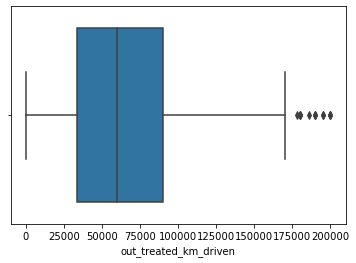

In [127]:
## Outlier treatment with Z Score

threshold = 3
outlier = []

for i in data['km_driven']:
    z = (i-data['km_driven'].mean())/data['km_driven'].std()
    if z > threshold:
        outlier.append(i)
        
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))

## calculate the median for the column excluding the outlier
med = data.loc[data['km_driven']<= min(outlier), 'km_driven'].median()
print('Median of the column excluding outliers-->',med)

f = lambda x: med if x>= min(outlier) else x
data['out_treated_km_driven'] = data['km_driven'].map(f)

max(data['out_treated_km_driven'])

# data.drop(['km_driven'], axis=1,inplace = True)

sns.boxplot(x='out_treated_km_driven', data=data)
plt.show()